<a href="https://colab.research.google.com/github/wakasu/Cat-Vs-Dogs-Image-Classifier/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

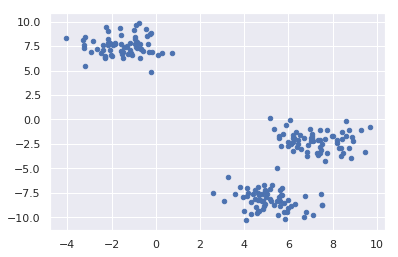

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3)

# Plotting the sample dataset
plt.scatter(X[:,0], X[:, 1], s=20)

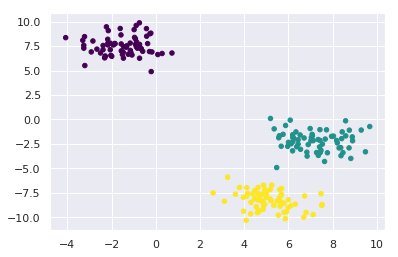

In [42]:
def find_clusters(X, n_clusters, rseed=2):
    # Randomly choosing clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
      # Assigning labels based on closest center
      labels = pairwise_distances_argmin(X, centers)
      # New Centers from means of points
      new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
      # Check for convergence
      if np.all(centers == new_centers):
        break
      centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');